# Vedant Saboo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [2]:
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df = data.head(10)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<function matplotlib.pyplot.show(close=None, block=None)>

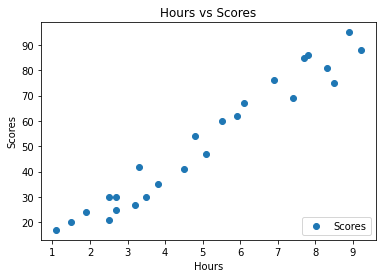

In [4]:
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(['Scores'], loc = 'lower right')

plt.title('Hours vs Scores')
plt.show

In [5]:
X = data.iloc[:, :-1].values
X


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [6]:
y = data.iloc[:, 1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [7]:
?train_test_split

In [8]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [9]:
regression = LinearRegression()
regression.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

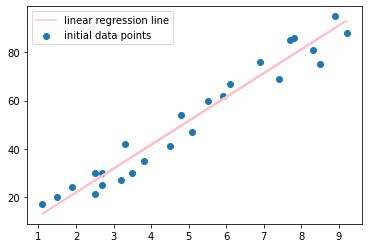

In [10]:
line = regression.coef_*X + regression.intercept_

plt.scatter(X,y)
plt.plot(X,line, color= 'pink')
plt.legend(['linear regression line', 'initial data points'])
plt.show()

In [11]:
print(X_test)
y_pred = regression.predict(X_test)
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [12]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [13]:
df = pd.DataFrame({'ID':[0,1,2,3,4],'Predicted values': y_pred, 'Actual values': y_test })
df

,ID,Predicted values,Actual values
0,0,16.884145,20
1,1,33.732261,27
2,2,75.357018,69
3,3,26.794801,30
4,4,60.491033,62


In [14]:
print('Training score: ', regression.score(X_train,y_train))
print('testing score: ', regression.score(X_test,y_test))

Training score:  0.9515510725211552
testing score:  0.9454906892105356


<function matplotlib.pyplot.show(close=None, block=None)>

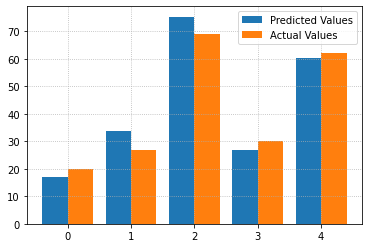

In [15]:
plt.bar(df['ID'] - 0.2 , df['Predicted values'], width = 0.4)
plt.bar( df['ID'] + 0.2,df['Actual values'], width = 0.4)
plt.legend(['Predicted Values','Actual Values'])
plt.grid(linestyle = 'dotted')
plt.show

In [16]:
hours = 9.25
test = np.array([hours])
test = test.reshape(1,-1)


In [17]:
pred = regression.predict(test)
pred

array([93.69173249])

In [18]:
print("No of hours = ", hours)
print('Predicted Score = ', pred[0])

No of hours =  9.25
Predicted Score =  93.69173248737538


In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356
